# Research questions

## Exploratory Data Analysis

###  RQ1

A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels?
1) What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

2) How many times, on average, a user views a product before adding it to the cart?

3) What’s the probability that products added once to the cart are effectively bought?

4) What’s the average time an item stays in the cart before being removed?

5) How much time passes on average between the first view time and a purchase/addition to cart?

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import operator

In [2]:
oct_dataset= pd.read_csv("2019-Oct.csv", header="infer",
                        parse_dates =["event_time"],
                        date_parser=pd.to_datetime)

In [3]:
nov_dataset= pd.read_csv("2019-Nov.csv", header="infer",
                        parse_dates =["event_time"],
                        date_parser=pd.to_datetime)

In [4]:
#faccio concat outer join tra i due dataset
dataset=pd.concat([oct_dataset,nov_dataset],ignore_index=True, axis=0)


In [5]:
#rate of complete funnels =purchases/ number of total operations

len(dataset[dataset.event_type=="purchase"])/len(dataset)


0.015095741554015692

#### 1) What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc). 

In [6]:
dataset.groupby(["event_type"]).user_session.count()
#  the operation users repeat more on average within a session is the view

event_type
cart          3955434
purchase      1659788
view        104335509
Name: user_session, dtype: int64

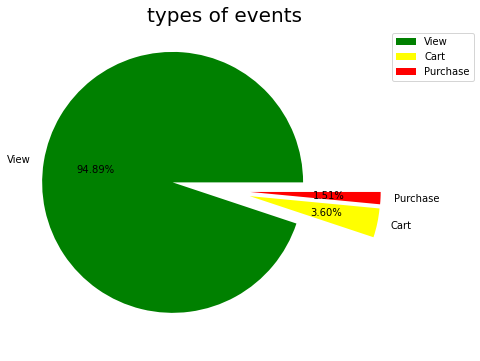

In [7]:
my_labels = ["View", "Cart", "Purchase",]
my_colors = ["green","yellow","red"]
my_explode=[0.4,0.2,0.2]
plt.figure(figsize=(6,6))
plt.pie(dataset["event_type"].value_counts(),
        labels=my_labels,
        colors = my_colors,
        explode=my_explode,
        autopct="%.2f%%")
plt.legend(bbox_to_anchor=(1,1))
plt.title("types of events", fontsize=20)
plt.show()

##### 2) How many times, on average, a user views a product before adding it to the cart?

In [8]:
view_dataset=dataset[dataset.event_type=="view"]
purchase_dataset=dataset[dataset.event_type=="purchase"]
cart_dataset=dataset[dataset.event_type=="cart"]
#creating datasets with just cart,purchase,view event types

In [9]:
view_dataset.groupby(["user_id"]).event_type.count().mean()
#how many views a user does on average

19.626222130091676

In [10]:
cart_dataset.groupby(["user_id"]).event_type.count().mean()
#how many items a user puts in cart on average

3.7523215761199014

In [11]:
(view_dataset.groupby(["user_id"]).event_type.count().mean())/(cart_dataset.groupby(["user_id"]).event_type.count().mean())
#how many views on average a user do before putting an item in cart 

5.230421149134618

##### 3) What’s the probability that products added once to the cart are effectively bought?

In [12]:
cart_dataset.groupby(["event_type"]).event_type.count()
#number of times a product has been added to the cart

event_type
cart    3955446
Name: event_type, dtype: int64

In [13]:
purchase_dataset.groupby(["event_type"]).event_type.count()
#number of times a product has been bought

event_type
purchase    1659788
Name: event_type, dtype: int64

In [14]:
(int(purchase_dataset.groupby(["event_type"]).event_type.count()))/(int(cart_dataset.groupby(["event_type"]).event_type.count()))
#(probability) times that a product has been bought once was added to the cart

0.41962094792850163

##### 4)What’s the average time an item stays in the cart before being removed?
an item is removed form the cart if it's bought or if the session ended without being bought(we assume that the cart has "no memory", a new user session of the same user id have nothing inside the cart)

In [15]:
last_op_dataset=dataset.groupby(["user_session","product_id"],as_index=False).event_time.last()
last_op_dataset
#to define when a user session ended we see the time of the last operation

,user_session,product_id,event_time
0,00000042-3e3f-42f9-810d-f3d264139c50,54900011,2019-10-18 10:55:20+00:00
1,00000056-a206-40dd-b174-a072550fa38c,1003312,2019-10-31 06:28:47+00:00
2,00000056-a206-40dd-b174-a072550fa38c,1004858,2019-10-31 06:26:58+00:00
3,00000056-a206-40dd-b174-a072550fa38c,1005104,2019-10-31 06:28:21+00:00
4,00000056-a206-40dd-b174-a072550fa38c,1005105,2019-10-31 06:25:30+00:00
...,...,...,...
69746994,fffffbbe-9f76-403b-b17c-e7c68c48ea1c,1005174,2019-11-17 09:43:04+00:00
69746995,fffffc65-7ce9-435c-8b72-1d9f7062fe77,16000642,2019-10-11 06:10:54+00:00
69746996,fffffc65-7ce9-435c-8b72-1d9f7062fe77,16000914,2019-10-11 06:10:23+00:00
69746997,fffffd01-5f95-4916-b2dd-491c603d6c9c,1004856,2019-11-17 14:12:46+00:00


In [16]:
#merge between dataset with just the cart type event and the last operation made in unser_session
n_dataset=pd.merge(cart_dataset,last_op_dataset,how="left",on=["user_session","product_id"])
n_dataset

,event_time_x,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_time_y
0,2019-10-01 00:05:14+00:00,cart,5100816,2053013553375346967,NaN,xiaomi,29.51,550121407,6f623695-9581-4633-813f-825b8760c7ae,2019-10-01 00:05:29+00:00
1,2019-10-01 00:09:33+00:00,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238,2019-10-01 00:10:42+00:00
2,2019-10-01 00:11:00+00:00,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683,2019-10-01 00:11:00+00:00
3,2019-10-01 02:17:59+00:00,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454,2019-10-01 02:29:58+00:00
4,2019-10-01 02:19:36+00:00,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda,2019-10-01 02:33:09+00:00
...,...,...,...,...,...,...,...,...,...,...
3955441,2019-11-30 23:58:55+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,2019-11-30 23:59:44+00:00
3955442,2019-11-30 23:59:26+00:00,cart,33000529,2055909009252155819,NaN,luminarc,25.28,576652951,30024390-3fee-430d-9892-72560a5b9948,2019-11-30 23:59:26+00:00
3955443,2019-11-30 23:59:29+00:00,cart,26205399,2053013563693335403,NaN,NaN,179.16,553345124,58c692ff-c7a9-4e35-9ec4-58598f1940e0,2019-11-30 23:59:44+00:00
3955444,2019-11-30 23:59:44+00:00,cart,3701309,2053013565983425517,appliances.environment.vacuum,polaris,89.32,543733099,a65116f4-ac53-4a41-ad68-6606788e674c,2019-11-30 23:59:44+00:00


In [17]:
n_dataset["time_elapse"]=(n_dataset.event_time_y-n_dataset.event_time_x)


In [18]:
(n_dataset.time_elapse.sum())/len(n_dataset) 
#time between put in cart and end of a session (aka non bought items)

Timedelta('0 days 00:04:15.657227528')

In [19]:
b_dataset=pd.merge(cart_dataset,purchase_dataset,how="inner",on=["user_session","product_id"])


In [20]:
b_dataset["time_elapse"]=(b_dataset.event_time_y-b_dataset.event_time_x)


In [21]:
(b_dataset.time_elapse.sum())/len(b_dataset)

Timedelta('0 days 00:00:49.913569534')

In [22]:
((n_dataset.time_elapse.sum())/len(n_dataset))+((b_dataset.time_elapse.sum())/len(b_dataset)) 
#average time an item stay in the cart before being removed(puchased or not purchased)

Timedelta('0 days 00:05:05.570797062')

##### 5)How much time passes on average between the first view time and a purchase/addition to cart?

In [23]:
#dataset with the time of the first operation per user session
first_dataset=dataset.groupby(["user_session","user_id"],as_index=False).event_time.first()

In [24]:
#dataset with the time of the first view per user session
first_view_dataset=first_dataset[dataset.event_type=="view"]

<ipython-input-24-76bdc9cf2335>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_view_dataset=first_dataset[dataset.event_type=="view"]


In [25]:
merge_add_cart=pd.merge(first_view_dataset,cart_dataset,how="inner",on=["user_session","user_id"])


,user_session,user_id,event_time_x,event_time_y,event_type,product_id,category_id,category_code,brand,price
0,00000083-8816-4d58-a9b8-f52f54186edc,546521725,2019-10-06 11:24:45+00:00,2019-10-06 11:33:54+00:00,cart,1004870,2053013555631882655,electronics.smartphone,samsung,289.52
1,000001fd-1f89-45e8-a3ce-fe3218cabfad,560486342,2019-10-25 08:30:42+00:00,2019-10-25 08:34:23+00:00,cart,1004834,2053013555631882655,electronics.smartphone,samsung,171.90
2,000001fd-1f89-45e8-a3ce-fe3218cabfad,560486342,2019-10-25 08:30:42+00:00,2019-10-25 08:35:50+00:00,cart,1004834,2053013555631882655,electronics.smartphone,samsung,171.90
3,000001fd-1f89-45e8-a3ce-fe3218cabfad,560486342,2019-10-25 08:30:42+00:00,2019-10-25 08:36:32+00:00,cart,1004834,2053013555631882655,electronics.smartphone,samsung,171.90
4,000001fd-1f89-45e8-a3ce-fe3218cabfad,560486342,2019-10-25 08:30:42+00:00,2019-10-25 08:38:28+00:00,cart,1004834,2053013555631882655,electronics.smartphone,samsung,171.90
...,...,...,...,...,...,...,...,...,...,...
3802458,fffff038-a8d6-4c8a-9bf3-afe71b52733a,518862395,2019-11-25 10:50:57+00:00,2019-11-25 10:55:22+00:00,cart,22700128,2053013556168753601,NaN,stels,65.38
3802459,fffff736-405e-485f-ac84-6a622ef44329,571263795,2019-11-17 05:38:10+00:00,2019-11-17 05:38:12+00:00,cart,12720089,2053013553559896355,NaN,roadx,24.97
3802460,fffff736-405e-485f-ac84-6a622ef44329,571263795,2019-11-17 05:38:10+00:00,2019-11-17 05:50:41+00:00,cart,30100076,2053013556110033341,NaN,NaN,41.67
3802461,fffffd01-5f95-4916-b2dd-491c603d6c9c,519073108,2019-11-17 14:07:11+00:00,2019-11-17 14:07:42+00:00,cart,1004856,2053013555631882655,electronics.smartphone,samsung,128.42


In [26]:
#dataset with the differences between the time the item was saw and the time the item was put in the cart 
merge_add_cart["time_elapse"]=(merge_add_cart.event_time_y-merge_add_cart.event_time_x)


In [27]:
merge_pur=pd.merge(first_view_dataset,purchase_dataset,how="inner",on=["user_session","user_id"])


In [28]:
#dataset with the differences between the time the item was saw and the time the item was purchased
merge_pur["time_elapse"]=(merge_pur.event_time_y-merge_pur.event_time_x)


In [29]:
((merge_add_cart.time_elapse.sum())+(merge_pur.time_elapse.sum()))/((len(merge_add_cart))+(len(merge_pur)))
#so the average time between a first view and a purchase/addition to cart it's about 11min and 16 seconds

Timedelta('0 days 00:11:16.394629389')

### RQ2

What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category.
1) Plot the most visited subcategories.

2) What are the 10 most sold products per category?

In [30]:
trending_dataset=dataset

In [31]:
trending_dataset=trending_dataset[dataset.category_code.notnull()]

In [32]:
trending_dataset[("category_code")]=trending_dataset.loc[:,("category_code")].str.split(".", n=1, expand=True)
#we consider for "trending" products, the ones that has been seen,put in cart and bought the most
#here we get rid of the sub_categories and keep just the categories

<ipython-input-32-fd2b611cc31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trending_dataset[("category_code")]=trending_dataset.loc[:,("category_code")].str.split(".", n=1, expand=True)


In [33]:
trending_dataset.groupby("category_code").product_id.count().sort_values(ascending=False) 
#this are the categories of the most trending products

category_code
electronics     40141709
appliances      13457119
computers        6505575
apparel          4554025
furniture        3358989
auto             2227274
construction     1822989
kids             1327003
accessories       628276
sport             424610
medicine           37188
country_yard       31808
stationery         20398
Name: product_id, dtype: int64

In [34]:
purchase_oct_dataset=oct_dataset[oct_dataset.event_type=="purchase"]
purchase_oct_dataset["category_code"]=oct_dataset.loc[:,("category_code")].str.split(".",n=1,expand=True)
#creating a dataset with just the purchases of october
#here we get rid of the sub_categories and keep just the categories

<ipython-input-34-9afe36a508a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_oct_dataset["category_code"]=oct_dataset.loc[:,("category_code")].str.split(".",n=1,expand=True)


In [35]:
purchase_nov_dataset=nov_dataset[nov_dataset.event_type=="purchase"]
purchase_nov_dataset["category_code"]=nov_dataset.loc[:,("category_code")].str.split(".",n=1,expand=True)
#creating a dataset with just the purchases of november
#here we get rid of the sub_categories and keep just the categories

<ipython-input-35-6ac27b38f972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_nov_dataset["category_code"]=nov_dataset.loc[:,("category_code")].str.split(".",n=1,expand=True)


In [36]:
purchase_oct_dataset.groupby("category_code").product_id.count().sort_values(ascending=False)
#this are the categories with the most sold products of october

category_code
electronics     423028
appliances       74996
computers        27855
auto             10620
furniture         8301
apparel           8002
construction      7801
kids              5482
accessories       1587
sport             1236
medicine           310
stationery         134
country_yard        72
Name: product_id, dtype: int64

In [37]:
purchase_nov_dataset.groupby("category_code").product_id.count().sort_values(ascending=False)
#this are the categories with the most sold products of november

category_code
electronics     493639
appliances       99026
computers        34477
apparel          14215
furniture        11542
auto             10719
construction      8699
kids              6166
accessories       2154
sport             1489
medicine           344
stationery         191
country_yard        60
Name: product_id, dtype: int64

<AxesSubplot:title={'center':'Top trending categories october'}, xlabel='Names of categories', ylabel='Number of sales'>

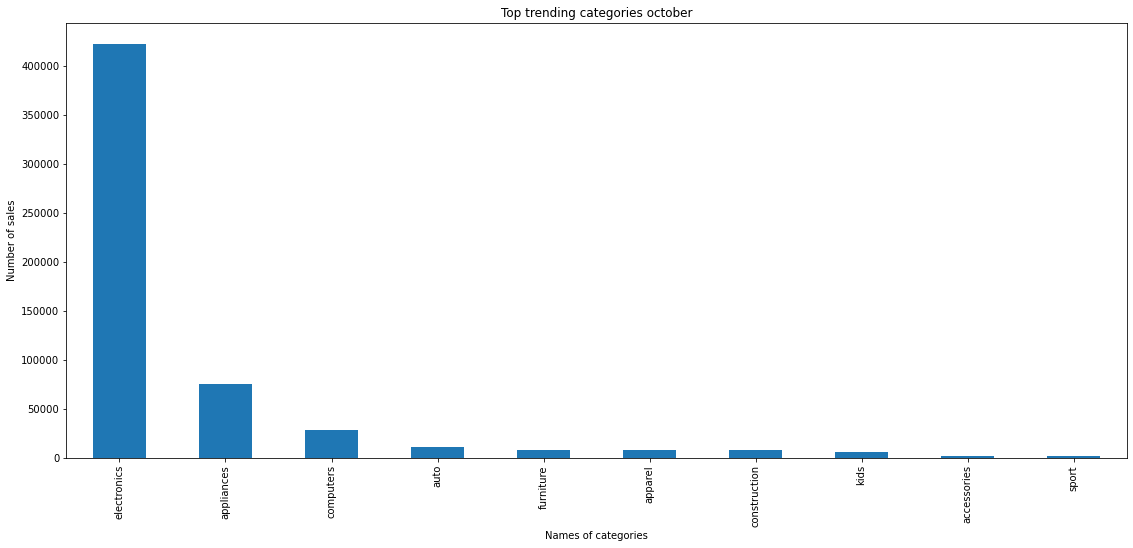

In [38]:
purchase_oct_dataset.groupby("category_code").product_id.count().sort_values(ascending=False).head(10).plot.bar(
    figsize = (19, 8), 
    title='Top trending categories october', 
    xlabel='Names of categories',
    ylabel='Number of sales')

<AxesSubplot:title={'center':'Top trending categories november'}, xlabel='Names of categories', ylabel='Number of sales'>

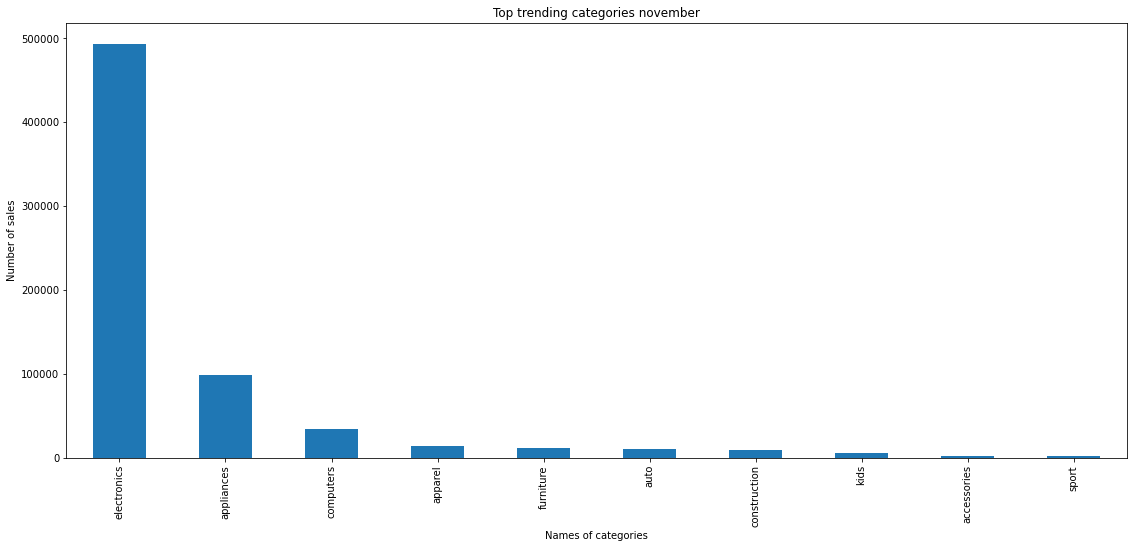

In [39]:
purchase_nov_dataset.groupby("category_code").product_id.count().sort_values(ascending=False).head(10).plot.bar(
    figsize = (19, 8), 
    title='Top trending categories november', 
    xlabel='Names of categories',
    ylabel='Number of sales')

##### 1) Plot the most visited subcategories.

In [40]:
view=dataset[dataset.event_type=="view"]


In [41]:
view=view[view.category_code.notnull()]

In [42]:
cat_dataset= view["category_code"].str.split(".",n=1, expand=True)
#create a new dataset with column 0 = categories and column 1=sub_categories

In [43]:
view["Sub_cat"]=cat_dataset[1]
#add to the view dataset the column with only the sub_cats

<AxesSubplot:title={'center':'Trend'}, xlabel='categoreies', ylabel='number of visit'>

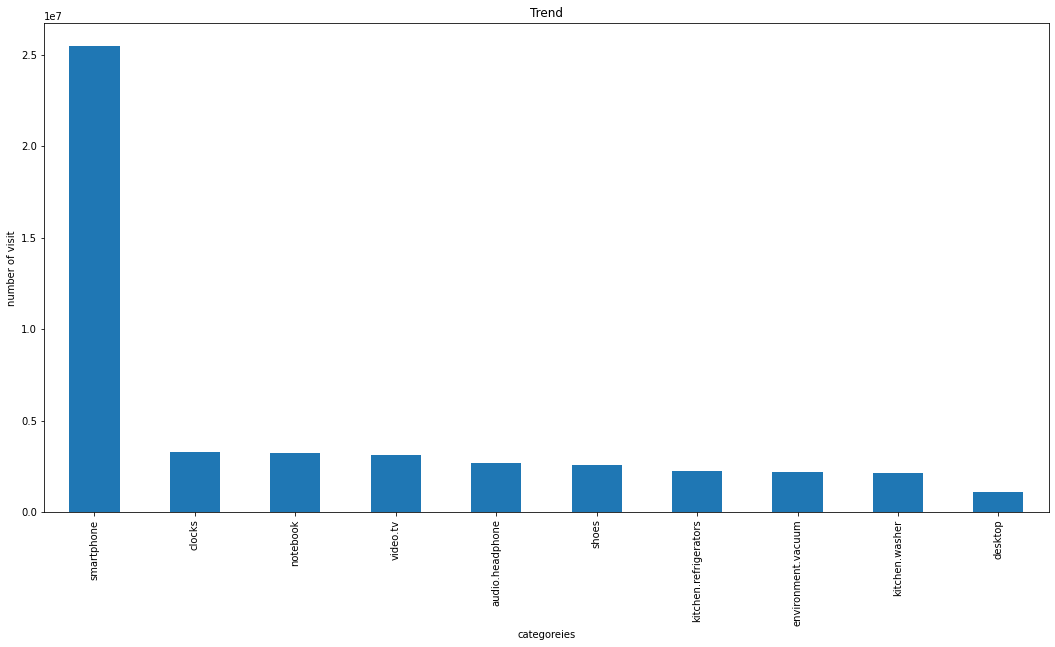

In [44]:
view.groupby("Sub_cat").product_id.count().sort_values(ascending=False).head(10).plot.bar(\
                                                                                         figsize =(18,9),
                                                                                          title="Trend",
                                                                                         xlabel="categoreies",
                                                                                         ylabel="number of visit")

##### 2) What are the 10 most sold products per category?


In [45]:
pur_dataset = dataset[dataset.event_type=='purchase']  
#create dataset with just purchases


In [47]:
pur_dataset = pur_dataset[pur_dataset.category_code.notnull()]


In [48]:
newcat = pur_dataset['category_code'].str.split(".", n=1, expand=True)


In [49]:
pur_dataset['only_cat'] = newcat[0]


In [50]:
newprod = pur_dataset['category_code'].str.rsplit(".", n=1, expand=True)


,0,1
162,electronics,smartphone
308,electronics,smartphone
442,furniture.bathroom,toilet
574,electronics.audio,headphone
603,electronics.audio,headphone
...,...,...
109950480,electronics,smartphone
109950489,electronics,smartphone
109950509,electronics,smartphone
109950588,electronics,smartphone


In [51]:
pur_dataset['only_prod'] = newprod[1]

#dataset with the categories(column"only cat")and the product(column"only prod")

In [52]:
pur_dataset.groupby(['only_cat', 'only_prod']).only_prod.count().sort_values(ascending=False).head(10)
#number of products per only_prod 

only_cat     only_prod    
electronics  smartphone       720665
             headphone         71337
             tv                51839
             clocks            41143
appliances   washer            35920
computers    notebook          34023
appliances   vacuum            30571
             refrigerators     24260
apparel      shoes             14395
electronics  tablet            11741
Name: only_prod, dtype: int64

In [53]:
lst = []
for cat, frame in pur_dataset.groupby('only_cat'):
    lst.append(cat)

In [54]:
#ten most sold products per category
for i in lst:
    print("")
    print(pur_dataset[pur_dataset.only_cat==str(i)].groupby(['only_cat', 'only_prod']).only_prod.count().sort_values(ascending=False).head(10))


only_cat     only_prod
accessories  bag          3015
             wallet        676
             umbrella       50
Name: only_prod, dtype: int64

only_cat  only_prod
apparel   shoes        14395
          keds          4981
          costume       1368
          jeans          309
          underwear      181
          shirt          160
          tshirt         151
          dress          127
          moccasins      102
          jumper          84
Name: only_prod, dtype: int64

only_cat    only_prod    
appliances  washer           35920
            vacuum           30571
            refrigerators    24260
            microwave         8855
            iron              8303
            blender           7086
            kettle            6542
            water_heater      6156
            oven              6069
            air_heater        6066
Name: only_prod, dtype: int64

only_cat  only_prod    
auto      player           8440
          alarm            5699
          videor

### RQ3

for each category, what’s the brand whose prices are higher on average?
1) Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

2) Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [5]:
cat_dataset=dataset

In [6]:
cat_dataset["category_code"]=cat_dataset["category_code"].str.split(".",n=1,expand=True)

In [7]:
cat_dataset.groupby(["category_code","brand"]).price.mean().sort_values(ascending=False)
#brand for each category with the higher prices on average

category_code  brand        
sport          pinarello        2533.238401
               nordictrack      2522.590000
               kessler          2372.000000
appliances     climadiff        2261.951167
computers      dreammachines    2221.466373
                                   ...     
electronics    acqua               3.065686
               continent           3.030050
               dagee               2.930000
construction   opple               2.750000
kids           mioshi              2.020000
Name: price, Length: 2496, dtype: float64

##### 1) Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

In [8]:
def cat(a):
    dataset["category_code"]=dataset["category_code"].str.split(".",n=1,expand=True)
    cat = dataset[dataset.category_code==str(a)]
    res= cat[cat.event_type=="purchase"].groupby("brand").price.mean().sort_values(ascending=False)
    res2= cat.groupby("brand").price.mean().sort_values(ascending=False)
    return res.head(20).plot.bar(figsize =(18,9))
#used the function head to keep the plot readable

In [ ]:
a=input("insert proper category: ")
cat(a)

##### 2) Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [9]:
dataset.groupby(["category_code","brand"]).price.mean().sort_values(ascending=True)

category_code  brand        
kids           mioshi              2.020000
construction   opple               2.750000
electronics    dagee               2.930000
               continent           3.030050
               acqua               3.065686
                                   ...     
computers      dreammachines    2221.466373
appliances     climadiff        2261.951167
sport          kessler          2372.000000
               nordictrack      2522.590000
               pinarello        2533.238401
Name: price, Length: 2496, dtype: float64

### RQ4

How much does each brand earn per month? Write a function that given the name of a brand in input returns, for each month, its profit. Is the average price of products of different brands significantly different?

1) Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).

In [20]:
def brand(a):
    brand = dataset[dataset.brand==str(a)]
    branov = datanov[datanov.brand==str(a)]
    profit = brand[brand.event_type=='purchase'].price.sum()
    profit2 = branov[branov.event_type=='purchase'].price.sum()
    return profit, profit2
    

In [ ]:
a = input("Scrivi brand :")
brand(a)

##### 1) Using the function you just created, find the top 3 brands that have suffered the biggest losses in earnings between one month and the next, specifing bothe the loss percentage and the 2 months (e.g., brand_1 lost 20% between march and april).



In [34]:
o_dataset=oct_dataset[:10000]
n_dataset=nov_dataset[:10000]

In [35]:
lst = []
for brand,frame in o_dataset.groupby('brand'):
    lst.append(brand)  
#take all the brands of the dataset and put them in to a list    

In [36]:
diff = 0.0
dictio = {}
for i in lst:
    brand = o_dataset[o_dataset.brand==str(i)]
    branov = n_dataset[n_dataset.brand==str(i)]
    profit = brand[brand.event_type=='purchase'].price.sum()
    profit2 = branov[branov.event_type=='purchase'].price.sum()
    if profit2 < profit:
        diff = profit - profit2
        perd = int((100*diff)/profit)
        dictio[i]=perd
#create a dictionary with the brand name and the %lost        

In [37]:
sorted_d = dict( sorted(dictio.items(), key=operator.itemgetter(1),reverse=True))

In [38]:
dict_items = sorted_d.items()

In [39]:
first_three = list(dict_items)[:3]

In [40]:
print(first_three)
#we print the 3 with the highest %loss
#100%could mean that the brand has stopped to sell it's item the next month

[('acer', 100), ('alteco', 100), ('asus', 100)]


### RQ5

In what part of the day is your store most visited? Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. Create a plot that for each day of the week show the hourly average of visitors your store has.

In [13]:
dataset.groupby([dataset.event_time.dt.dayofweek, dataset.event_time.dt.hour]).user_session.count().sort_values(ascending=False)
#part of the days in which the store is more visited (the first event_time is for the day of the week where 0=Monday and 6=Sunday)

event_time  event_time
4           16            1230037
            15            1218510
6           17            1173435
5           16            1169263
6           15            1163032
                           ...   
4           23              78139
1           23              68608
6           23              68388
2           23              67818
0           23              63573
Name: user_session, Length: 168, dtype: int64

<AxesSubplot:xlabel='event_time'>

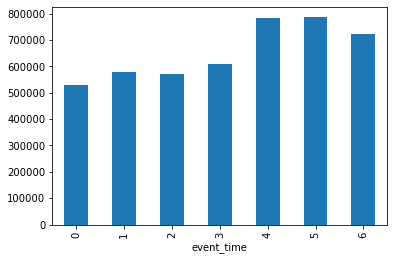

In [14]:
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df = dataset.groupby(dataset.event_time.dt.dayofweek).user_session.count()/24
df.plot.bar()


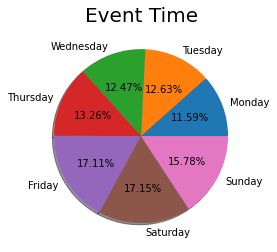

In [18]:
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
size = dataset.groupby(dataset.event_time.dt.dayofweek).user_session.count()/24
plt.pie(size, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event Time', fontsize = 20)
plt.axis('off')
plt.show()

### RQ6

the conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
1) Find the overall conversion rate of your store.

2) Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

##### 1) Find the overall conversion rate of your store.

In [19]:
#conversion rate=#purchases/#of views
len(dataset[dataset.event_type=="purchase"])/len(dataset[dataset.event_type=="view"])

0.01590817944828352

##### 2) Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.

In [41]:
cat_dataset=dataset


In [42]:
cat_dataset[("category_code")]=cat_dataset.loc[:,("category_code")].str.split(".", n=1, expand=True)
#dataset with just the categories(no sub_categories)

In [43]:
pur_cat_dataset=cat_dataset[cat_dataset.event_type=="purchase"]


In [44]:
pur_cat_dataset=pur_cat_dataset[pur_cat_dataset.category_code.notnull()]

<AxesSubplot:title={'center':'Purchases of each category'}, xlabel='categoreies', ylabel='number of purchases'>

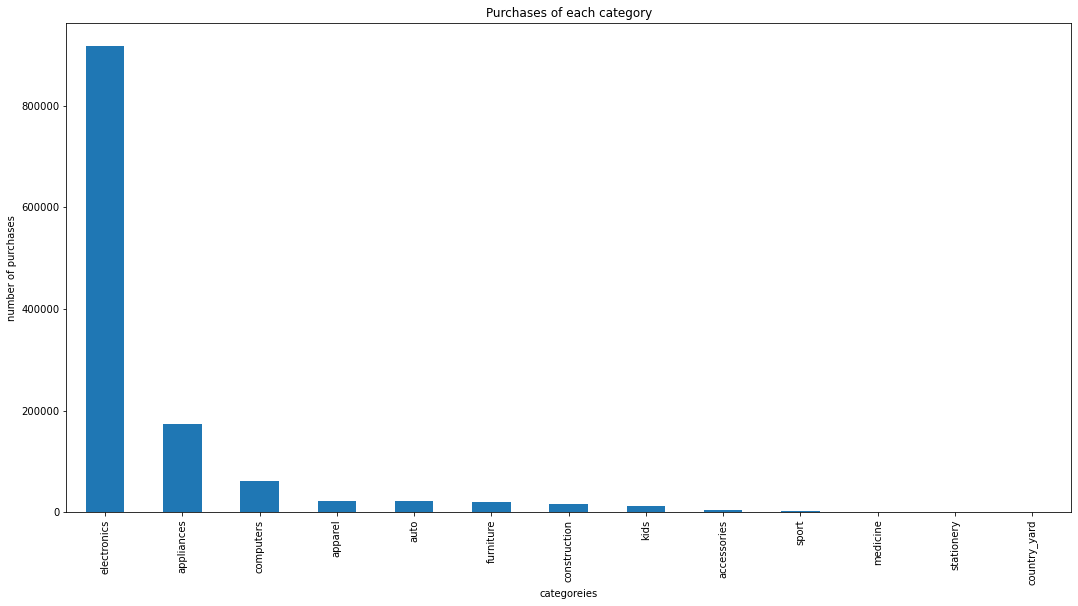

In [45]:
#plot of the number of purchases for each category
pur_cat_dataset.groupby(["category_code"]).size().sort_values(ascending=False).plot.bar(\
                                                                                         figsize =(18,9),
                                                                                          title="Purchases of each category",
                                                                                         xlabel="categoreies",
                                                                                         ylabel="number of purchases")

In [49]:
new_set=dataset


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
109950738,2019-11-30 23:59:58+00:00,view,15700137,2053013559733912211,NaN,NaN,277.74,532714000,02b4131c-0112-4231-aafa-ceaa08e77c1b
109950739,2019-11-30 23:59:58+00:00,view,28719425,2053013565639492569,apparel,baden,62.81,545223467,734c5eef-0742-4f8b-9d22-48f75b0bc359
109950740,2019-11-30 23:59:59+00:00,view,1004833,2053013555631882655,electronics,samsung,167.03,557794415,6fecf566-ebb0-4e70-a243-cdc13ce044cb
109950741,2019-11-30 23:59:59+00:00,view,2701706,2053013563911439225,appliances,samsung,566.27,531607492,368ddc8b-5db9-40fb-b7ff-b6582a1192c0


In [51]:
new_set["category_code"] = new_set["category_code"].str.split(".", n=1, expand=True)

In [52]:
new_set = new_set[new_set.category_code.notnull()]

conversion rate of each category:

In [53]:
lst = []
for catcode, frame in new_set.groupby('category_code'):
    lst.append(catcode)

In [54]:
lis = []
for i in lst:
    purcat = new_set[new_set.event_type=='purchase'][new_set.category_code==str(i)].event_type.count()
    view = dataset[new_set.event_type=='view'][new_set.category_code==str(i)].event_type.count()
    print(purcat/view)
    res = purcat/view
    lis.append(res)

<ipython-input-54-44bbf96d4e2c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purcat = new_set[new_set.event_type=='purchase'][new_set.category_code==str(i)].event_type.count()
<ipython-input-54-44bbf96d4e2c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  view = dataset[new_set.event_type=='view'][new_set.category_code==str(i)].event_type.count()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
lst
lis

In [ ]:
dictionary = dict(zip(lst,lis))

In [ ]:
sorted_d = dict( sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True))
sorted_d
#conversion rate of each category

### QR7

The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.
1) Prove that the pareto principle applies to your store.

##### 1) Prove that the pareto principle applies to your store.

In [55]:
pur_dataset=dataset[cat_dataset.event_type=="purchase"]

In [56]:
(len(pur_dataset.groupby(["user_id"]).user_id.count().sort_values(ascending=False))/100)*20

#20% of all the customers

139494.0

In [57]:
#20% of the costumers who spend the most
#(not directly correlated to the question but just to get an idea of how much they spend)
pur_dataset.groupby(["user_id"]).price.sum().sort_values(ascending=False).head(139494)

user_id
512386086    344153.29
515384420    303144.24
513117637    266331.24
519267944    265569.52
518514099    203986.07
               ...    
567111546       860.41
546982605       860.41
537925505       860.38
533288196       860.36
513601897       860.35
Name: price, Length: 139494, dtype: float64

In [58]:
#80%total profit
(pur_dataset.price.sum()/100)*80

404121914.2159998

In [59]:
#how much of the "20% of the costumers who spend the most" have spent in total
sum(pur_dataset.groupby(["user_id"]).price.sum().sort_values(ascending=False).head(139494))

364222233.810022

In [60]:
perc_profit_twenty=100*sum(pur_dataset.groupby(["user_id"]).price.sum().sort_values(ascending=False).head(139494))/pur_dataset.price.sum()
perc_profit_twenty

72.10145671345073

in conclusion 72% of the income comes from about 20% of the customers. we can say that the pareto's principle is approximately satisfied.